# About the project

**The purpose of this project:**

Using historical data on sales of computer games, user and expert ratings, genres and platforms, identify patterns that determine the success of a game.

The dataset is until the year 2016 (sales data for 2016 is not complete).

# Project findings summary

1. PS4 and Xbox One platforms are popular and growing at the moment
2. Sales of games for these platforms are affected by critical ratings, especially if the rating is above 60 points.
3. Popular genres in terms of sales - action, shooters, sports, RPG.
4. Shooters, Sports games, Platformers are much better than other genres on average.
5. The portrait of a game buyer in the US, EU and Japan is different. While shooters and action games are popular in the US and the EU, the RPG genre is the most popular in Japan.
6. Each genre has 1-2 most popular ESRB game ratings. For example, for racing and sports games - E, and for shooters and action games - M.
7. In Japan, most games do not have a rating.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

#opening dataset
data = pd.read_csv('./datasets/games.csv')

#printing out the first 5 lines
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [2]:
#removing full duplicates
data = data.drop_duplicates()

In [3]:
#checking data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Data Description:
- About half of the data on user ratings, critics and game ratings are missing.
- A couple of games are missing names. Further analysis is required - if they do not have genre data, then they must be removed from further calculations.
- Approximately 2% of the data do not have values for the year the game was released - it is necessary to remove them from the calculations.

Columns that require data type replacement:
- User-Score on a numeric value (float)
- Year of release to an integer value (int)

In [4]:
#checking data for anomalies
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


1. Preliminarily, sales data in all countries seem very strange - the average differs from the maximum by two orders of magnitude
2. Check User_Score after datatype change

# Preparing data


**Renaming columns**

In [5]:
#changing column names to lower case
data.columns= data.columns.str.lower()

In [6]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Preparing data by sales values**

In [7]:
#checking sales data in NA where sales are less than 1 thousand
data.query('na_sales < 0.001').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,0.0,0.00,4.87,0.00,NaN,NaN,NaN
340,Friend Collection,DS,2009.0,Misc,0.0,0.00,3.67,0.00,NaN,NaN,NaN
385,Monster Hunter 4,3DS,2013.0,Role-Playing,0.0,0.00,3.44,0.00,NaN,NaN,NaN
403,English Training: Have Fun Improving Your Skills!,DS,2006.0,Misc,0.0,0.99,2.32,0.02,NaN,NaN,NaN
428,Dragon Quest VI: Maboroshi no Daichi,SNES,1995.0,Role-Playing,0.0,0.00,3.19,0.00,NaN,NaN,NaN
530,Dragon Quest V: Tenkuu no Hanayome,SNES,1992.0,Role-Playing,0.0,0.00,2.78,0.01,NaN,NaN,NaN
563,Yokai Watch 2 Shinuchi,3DS,2014.0,Role-Playing,0.0,0.00,2.68,0.00,NaN,NaN,NaN
574,Super Mario Bros.: The Lost Levels,NES,1986.0,Platform,0.0,0.00,2.65,0.00,NaN,NaN,NaN
632,Final Fantasy V,SNES,1992.0,Role-Playing,0.0,0.00,2.43,0.02,NaN,NaN,NaN
674,Dragon Warrior Monsters,GB,1998.0,Role-Playing,0.0,0.00,2.34,0.01,NaN,NaN,NaN


Many games sell millions of copies in one region and don't sell at all in other regions! So it's not a data error.
Let's add a column with total sales to evaluate the sales in the dataset.

In [8]:
#creating a new column to count sales in different regions
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [9]:
data['total_sales'].describe()

count    16715.000000
mean         0.533396
std          1.548261
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

**Working with value 'tbd' in user_score column** 

The user_score column contains the text value 'tbd' in addition to numbers.
Because of this, it is not possible to replace the data type in the user_score column. Let's check how many such values there are.

In [10]:
data.query('user_score == "tbd"')['user_score'].count()

2424

There are more than two thousand tbd values. For research, such values do not fundamentally differ from empty ones - we cannot extract additional information from estimates, which are practically non-existent. Tbd means evaluation is still in progress.
Let's replace the 'tbd' values in the user_score column with empty ones.

In [11]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

**Handling missing values**

In [12]:
#deleting rows where year_of_release data is missing 
data = data[~data['year_of_release'].isna()]

In [13]:
#checking rows with name of the game missing
data_empty = data[data['name'].isna()]
data_empty.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


In [14]:
#deleting rows with name missing
data = data[~data['name'].isna()]

In [15]:
#deleting rows with sales data missing
data = data[data['total_sales'] > 0]

In [16]:
#in the column with the ESRB rating, we will replace the empty values with 'No rating', this will allow us to form an additional. rating group
data['rating'] = data['rating'].fillna('no rating')

- Removed the lines where there were empty names of games and genre, tk. it will not be possible to make additional analysis on them and there are only 2 of them.
- Removed lines with zero total sales
- Removed lines with gaps in the year of publication - it is impossible to fill them out from the current data, additional desk-research is required (about 2% of the data)
- Replaced empty values in the ESRB rating column with 'no rating', which will allow categorical analysis for this column
- Empty values with critic and user ratings cannot be filled with any average, because assessment is a subjective thing. In addition, it is not very clear why the values are empty - either there are no reviews, or this is a platform error. Leave gaps.

Data gaps do not appear to be systemic. Perhaps they are associated with poor filling of open data sources.

**Changing data type in columns**

In [17]:
#Converting the data to the required types.
#change the data type in the user_score column to a numeric value (float)
data['user_score'] = data['user_score'].astype('float')

#change the data type in the year of release column to an integer value (int)
data['year_of_release'] = data['year_of_release'].astype('int')

In [18]:
data['user_score'].describe()

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

Replaced data types in user_score columns (after replacing 'tbd' values with empty ones, it became possible) and year_of_release. Release year must be an integer for convenience and memory saving. And user ratings are floating point numbers so that you can analyze the data.

# Exploratory data analysis

**Game releases by year**

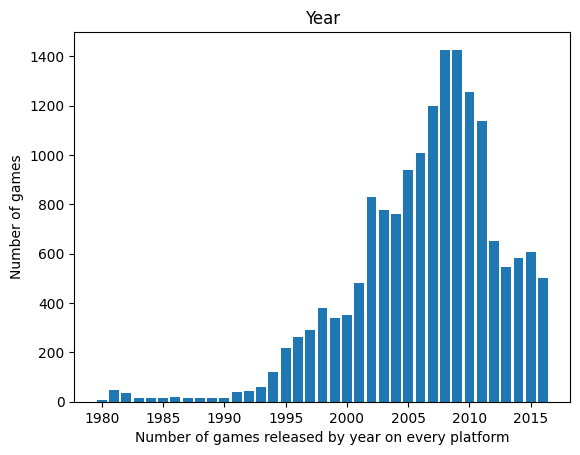

In [19]:
#compile a table by the number of games by year of release and by their total sales
games_by_year = data.groupby('year_of_release').agg(number_of_games=('total_sales', 'count'))

plt.bar(games_by_year.index, games_by_year['number_of_games'])
 
plt.xlabel("Number of games released by year on every platform")
plt.ylabel("Number of games")
plt.title("Year")
plt.show()

The graph shows that until 1995, up to 200 games were released on all platforms (with repetitions: in the graph, 1 game that was released on 4 platforms was counted 4 times) per year. After 2000, there has been a rapid increase in the number of released games per year, and after 2010, probably with the complication and rise in the cost of development, there has been a decrease in the number of released games to ~ 600 per year.

Even based on this graph, it is clear that we most likely will not need data before 2000 in further calculations.

**Game sales by platform. Average platform lifetime**

In [20]:
#compile a table with the largest sales by platform, the number of games on the platform,
#the year when the game was first released for the platform, the last year when the game was released for the platform
top_platforms = data.groupby('platform').agg(total_sales=('total_sales', 'sum'), 
                                             number_of_games=('total_sales', 'count'), 
                                             first_year=('year_of_release', 'min'), 
                                             last_year=('year_of_release', 'max')).sort_values(by='total_sales', 
                                             ascending=False)

In [21]:
#add a column with the difference between the release date of the first platform game and the last release date of the platform game
top_platforms['change'] = top_platforms['last_year'] - top_platforms['first_year']
top_platforms.head(15)

,total_sales,number_of_games,first_year,last_year,change
platform,,,,,
PS2,1233.56,2126,2000,2011,11
X360,961.24,1232,2005,2016,11
PS3,931.34,1305,2006,2016,10
Wii,891.18,1286,2006,2016,10
DS,802.78,2121,1985,2013,28
PS,727.58,1190,1994,2003,9
PS4,314.14,392,2013,2016,3
GBA,312.88,811,2000,2007,7
PSP,289.53,1193,2004,2015,11


From the table of the top 15 platforms of all time, it can be seen that the most popular platform is PS2, but it is no longer relevant. As well as half of this list.
Games in 2016 were released only for 6 platforms, and the rest have already ceased to be relevant.

For DS, strange data, given that the platform was released in 2004. Let's check.

In [22]:
data[(data['platform'] == 'DS') & (data['year_of_release'] < 2004)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,no rating,0.02


In [23]:
#delete this row
data = data.drop(data[(data['platform'] == 'DS') & (data['year_of_release'] < 2004)].index)

In [24]:
#collect a separate dataset with the 10 most popular platforms
top_platforms_data = data[data['platform'].isin(top_platforms.index[0:9])]

In [25]:
#group data by platform and total sales by year of release
top_platforms_by_year = top_platforms_data.groupby(['platform', 'year_of_release']).agg(total_sales=('total_sales', 'sum'))
top_platforms_by_year = top_platforms_by_year.reset_index()

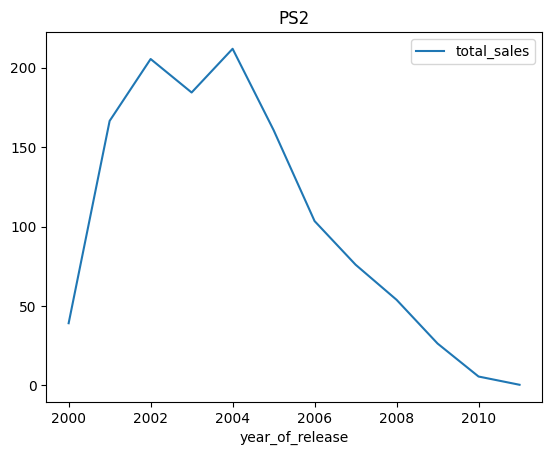

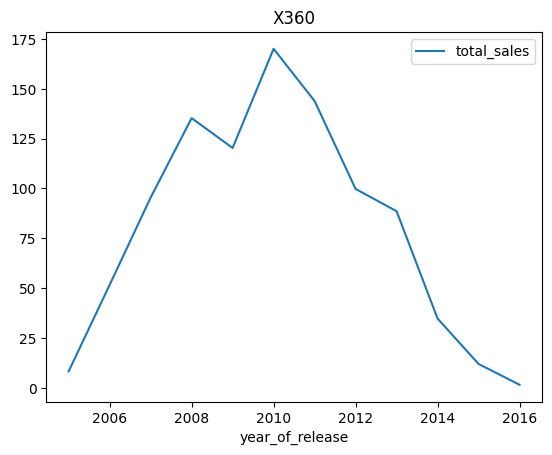

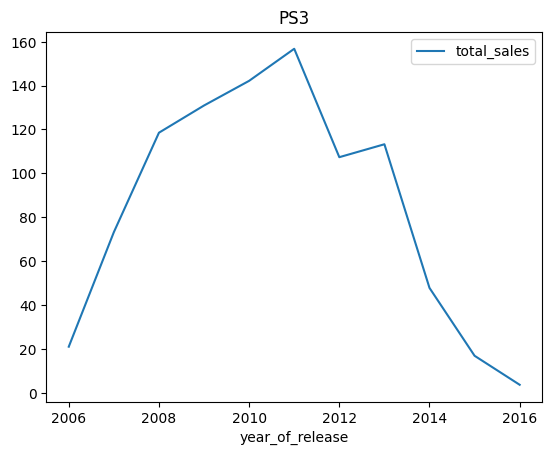

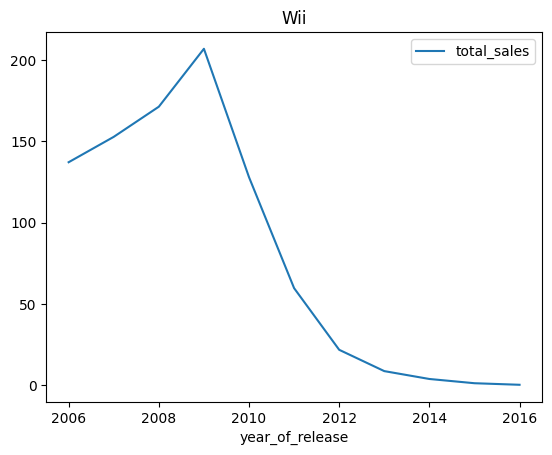

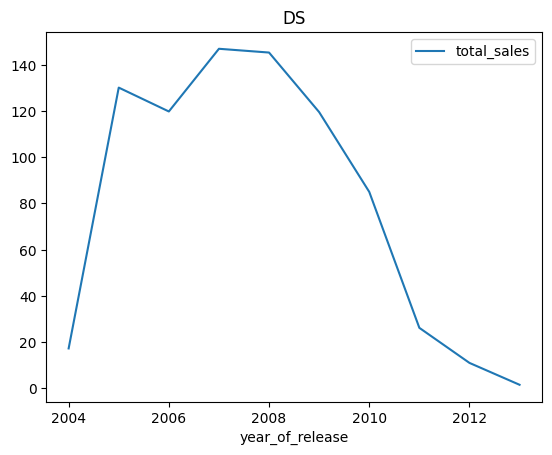

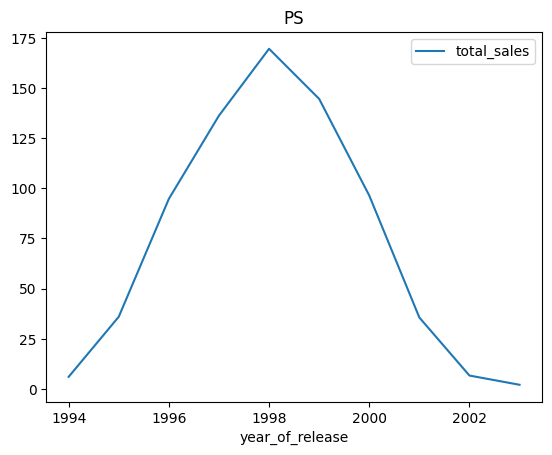

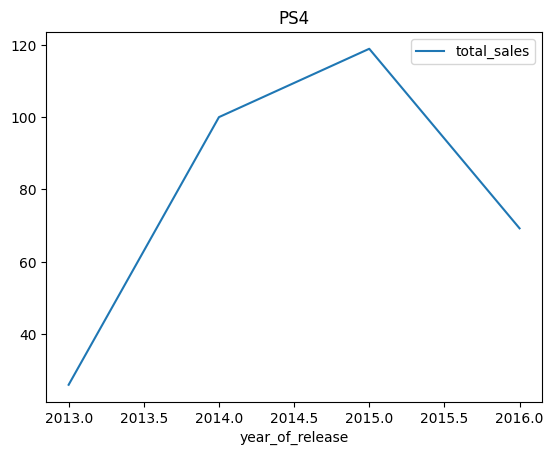

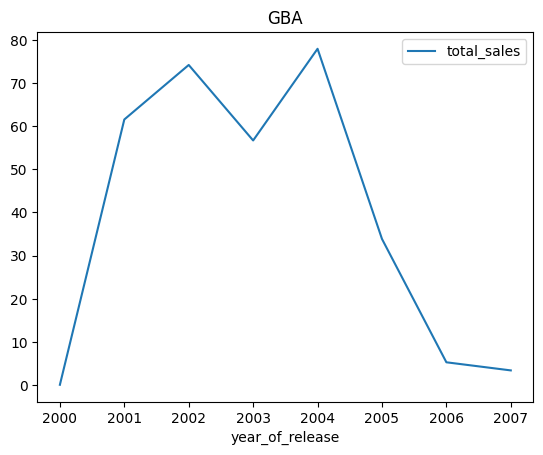

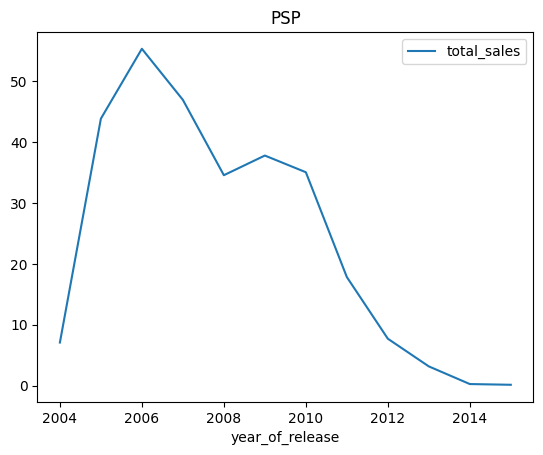

In [26]:
#for each of the top 10 platforms, draw a sales graph by year
for value in top_platforms.index[0:9]:
    top_platforms_by_year[top_platforms_by_year['platform'] == value].plot(x='year_of_release')
    plt.title(value)
    plt.show()

**Conclusion**
1. Based on the graphs, the peak of sales per platform occurs approximately 3-4 years after the release of games on the platform.
2. The average life of platforms (which are no longer relevant) is approximately 7 years.

In [27]:
#quantifying the second point in the conclusion
print('Lifetime of current platforms:', top_platforms.query('last_year != 2016')['change'].median())

Lifetime of current platforms: 6.5


**Selecting relevant data for further analysis**

To further evaluate current platforms and games, you must select data for the current period.

The current period can be considered data from 2013, because:

1. Data on the top 10 platforms of all time shows that the peak sales per platform are 3-4 years from the start of sales

2. Data for all obsolete platforms (for which games are no longer released in 2016) indicate that the average lifetime of the platform is 6.5 years. Those. taking data from 2013 and later, we will just be able to identify platforms that by 2017 will either

     a) grow
    
     b) at the peak
    
     c) decrease significantly

In [28]:
#select data from 2013
good_data = data[data['year_of_release'] >= 2013]

**Leading platforms. Potentially profitable platforms**

In [29]:
#group data by platform and total sales by year of release
tp_good_data = good_data.groupby('platform').agg(total_sales=('total_sales', 'sum'), last_year=('year_of_release', 'max'))
tp_good_data.sort_values(by='total_sales', ascending=False)

,total_sales,last_year
platform,,
PS4,314.14,2016
PS3,181.43,2016
XOne,159.32,2016
3DS,143.25,2016
X360,136.80,2016
WiiU,64.63,2016
PC,39.43,2016
PSV,32.99,2016
Wii,13.66,2016


In [30]:
#remove the platforms on which games were not released in 2016
tp_good_data = tp_good_data[tp_good_data['last_year'] == 2016]
good_data = good_data[(good_data['platform'] != 'DS') & (good_data['platform'] != 'PSP')]

In [31]:
#group data by platforms and total sales by year of release (For the period 2013-2016)
tp_by_year = good_data.groupby(['platform', 'year_of_release']).agg(total_sales=('total_sales', 'sum'))

#reset index for simplicity
tp_by_year = tp_by_year.reset_index()
tp_good_data = tp_good_data.reset_index()

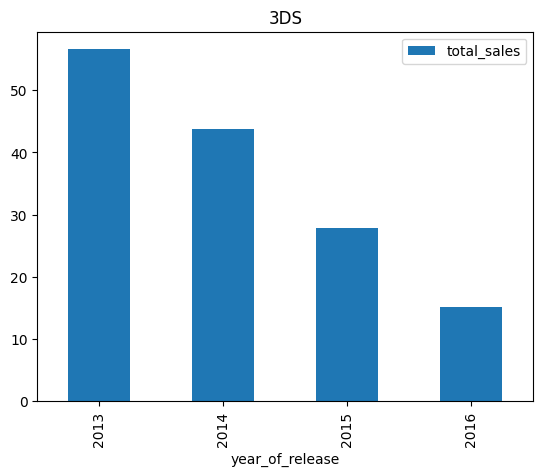

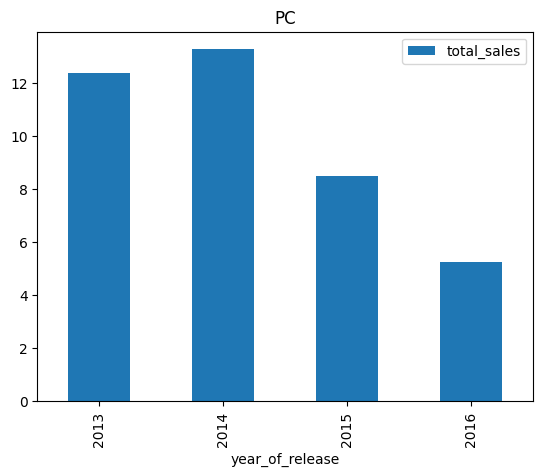

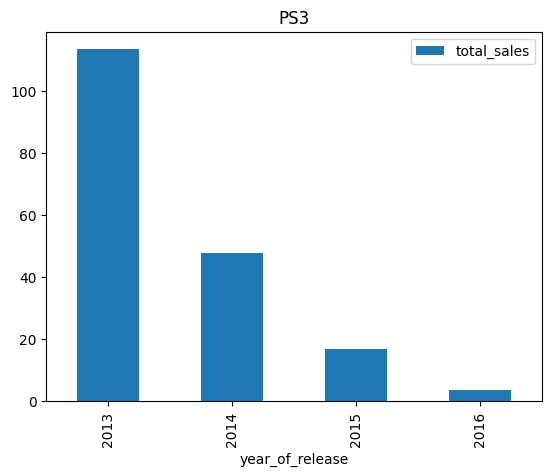

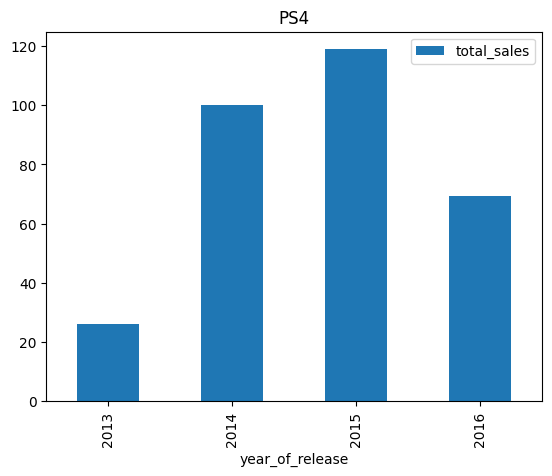

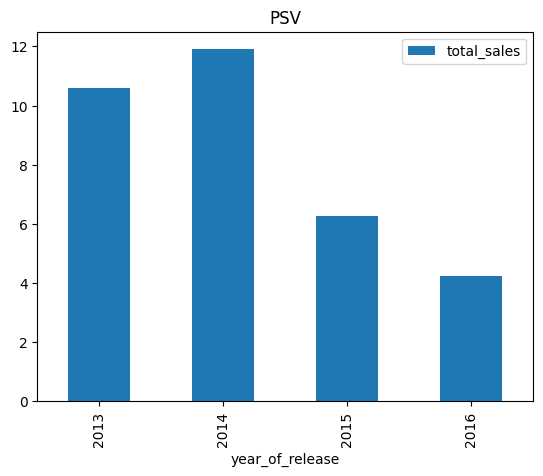

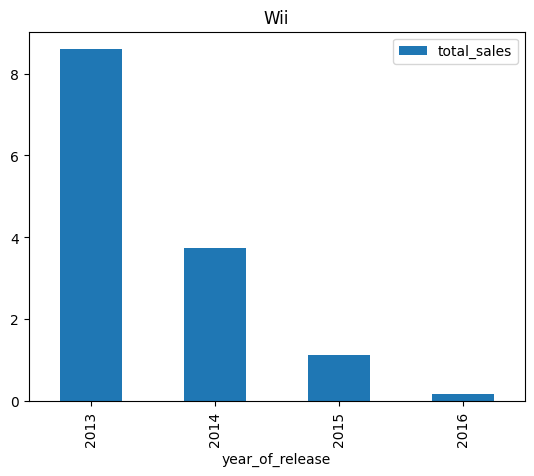

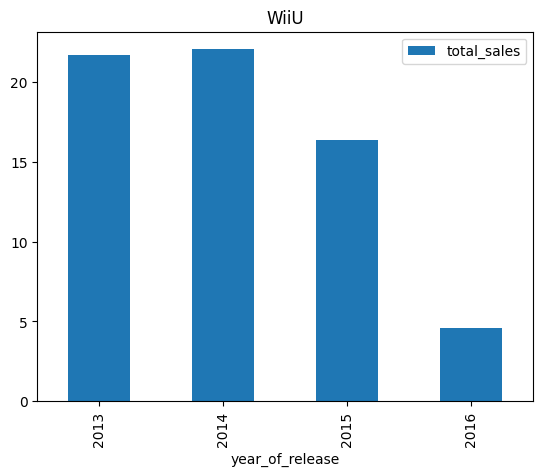

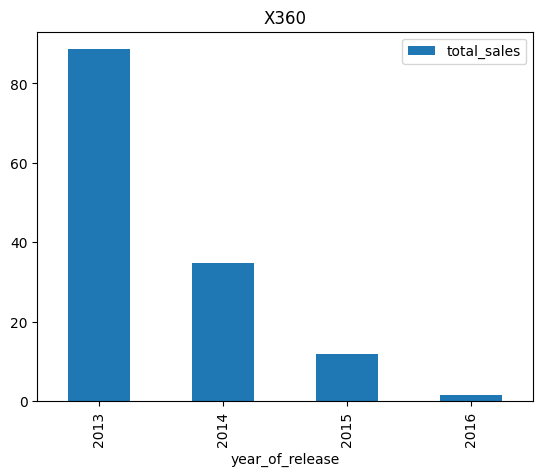

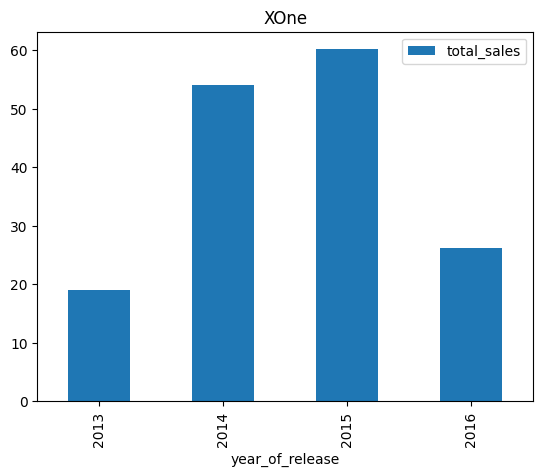

In [32]:
#draw distribution graphs to identify rising and falling platforms
for value in tp_good_data['platform']:
    tp_by_year[tp_by_year['platform'] == value].plot(kind='bar', x='year_of_release')
    plt.title(value)
    plt.show()

Considering that in 2016 the data is incomplete, it would be correct to pay attention to the comparison of 2013 and 2015. on charts.
Thus, of the growing platforms, we only have:
1. PS4

2. Xbox One

All other platforms (even PC) have experienced a decline in sales over the past 4 years.

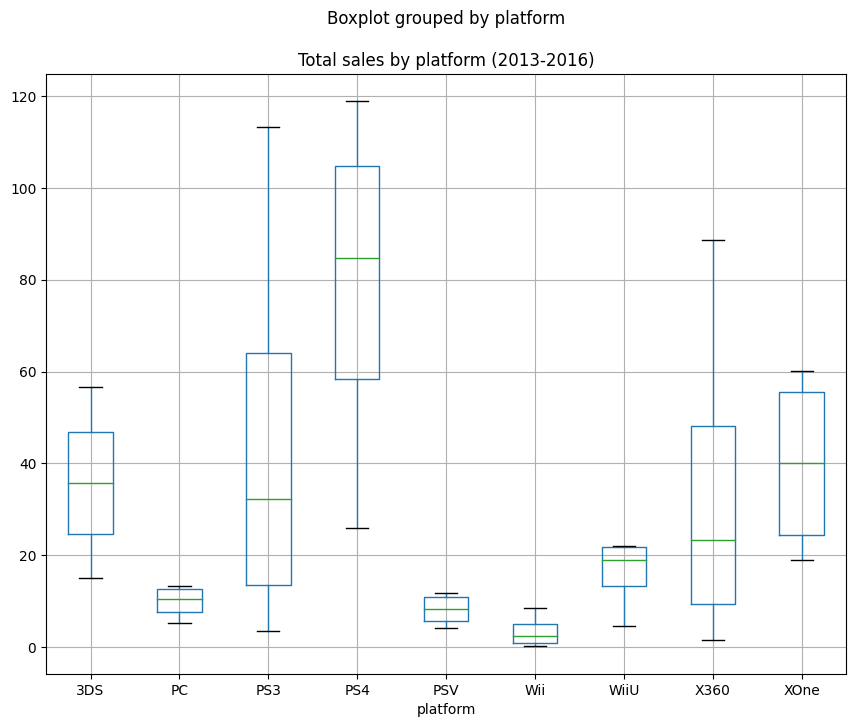

In [33]:
#draw boxplot of total sales by platforms 
tp_by_year.boxplot(column="total_sales", by="platform", figsize=(10, 8))
plt.title('Total sales by platform (2013-2016)')
plt.show()

**Conclusions by platform:**
PS4 and Xbox One are not only the only growing platforms, but also the largest ones at the moment. Also a large platform is the 3DS, but sales for this platform in 2015 and for an incomplete 2016. about two times lower than in 2013.

**Influence of user and critic reviews on game sales on popular platforms**


In [34]:
#group data by platforms and total sales by year of release (For the period 2013-2016)
review_by_platform = good_data.groupby('platform').agg(critic_count=('critic_score', 'count'), critic_mean=('critic_score', 'mean'), user_count=('user_score', 'count'), user_mean=('user_score', 'mean'))
review_by_platform

,critic_count,critic_mean,user_count,user_mean
platform,,,,
3DS,71,68.338028,80,6.976250
PC,149,75.550336,155,6.269677
PS3,121,70.198347,186,6.348387
PS4,252,72.091270,257,6.748249
PSV,77,71.636364,99,7.527273
Wii,0,NaN,7,5.257143
WiiU,70,71.642857,80,7.017500
X360,81,69.234568,143,5.993007
XOne,169,73.325444,182,6.521429


Most user reviews and critics in the data on the PS4 platform. It is noteworthy that the average score of critics, regardless of the platform, for consoles is very close - from 68 to 73 points, PC games are rated on average higher - 75 points.

User ratings (excluding Wii ratings) of games range from 6 to 7.5 points on average. It can also be noted that users on average rate games lower on every platform except for 3DS and PSV (if user ratings are converted from 10 points to 100 points).

In [35]:
#select only data for the most popular platform - PS4
ps4_data = good_data[good_data['platform'] == 'PS4']

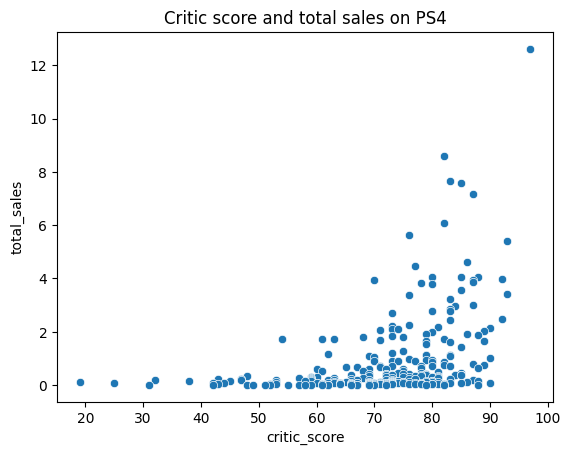

In [36]:
#scatter plot based on reviews of critics and sales of games on PS4
sns.scatterplot(x=ps4_data['critic_score'], y=ps4_data['total_sales'])
plt.title('Critic score and total sales on PS4')
plt.show()

The scatter plot shows that as user ratings increase, sales also increase. Games with ratings below 60 (with a few exceptions) have almost no sales above 2 million copies.
Hit games with sales above 4 million copies have ratings of 70 points or more.

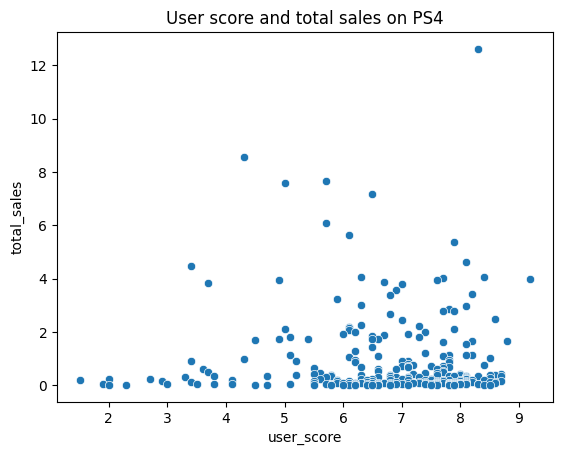

In [37]:
#scatter plot based on user reviews and sales of games on PS4
sns.scatterplot(x=ps4_data['user_score'], y=ps4_data['total_sales'])
plt.title('User score and total sales on PS4')
plt.show()

User ratings and game sales do not appear to be strongly related at first glance. A large accuracy of ratings lies from 6 to 8 points, however, many bestsellers have ratings below 6.

In [38]:
#Calculate the correlation between critic/user reviews and PS4 sales
print('Correlation between Critics score and PS4 Game Sales:', ps4_data['total_sales'].corr(ps4_data['critic_score']))
print('Correlation between User ratings and PS4 game sales:', ps4_data['total_sales'].corr(ps4_data['user_score']))

Correlation between Critics score and PS4 Game Sales: 0.4065679020617816
Correlation between User ratings and PS4 game sales: -0.03195711020455643


We also confirm the data on scatter plots with correlation. Critics' ratings and game sales have a positive correlation, but not a strong one (perhaps the correlation will increase if you take games with ratings of 60 points or more).

There is no correlation between user ratings and game sales.

In [39]:
#calculate the correlation between critic/user reviews and PS4 sales for games over 1 million copies
print('Correlation Between Critics Score and Sales of Popular PS4 Games:', ps4_data['total_sales'].corr(ps4_data[ps4_data['critic_score'] >= 60]['critic_score']))

Correlation Between Critics Score and Sales of Popular PS4 Games: 0.4451732129977855


**Conclusion**
Game sales volumes have a certain correlation with critics' ratings, though not very strong. At the same time, scores above 60 points have a greater impact on the number of sales.
User ratings and game sales have nothing to do with each other.

Let's also look at the impact of critical and user reviews on PC and Xbox One game sales.

In [40]:
#calculate the correlation between critic/user reviews and sales on Xbox One
print('Correlation between Critics score and XOne Game Sales:', good_data[good_data['platform'] == 'XOne']['total_sales'].corr(good_data['critic_score']))
print('Correlation between User ratings and XOne game sales:', good_data[good_data['platform'] == 'XOne']['total_sales'].corr(good_data['user_score']))

Correlation between Critics score and XOne Game Sales: 0.41699832800840164
Correlation between User ratings and XOne game sales: -0.06892505328279415


In [41]:
#calculate the correlation between critic/user reviews and sales on PC
print('Correlation between Critics score and PC Game Sales:', good_data[good_data['platform'] == 'PC']['total_sales'].corr(good_data['critic_score']))
print('Correlation between User ratings and PC game sales:', good_data[good_data['platform'] == 'PC']['total_sales'].corr(good_data['user_score']))

Correlation between Critics score and PC Game Sales: 0.1960302829436937
Correlation between User ratings and PC game sales: -0.09384186952476747


It's an interesting picture of critical ratings and PC game sales - here, unlike PS4 and Xbox One, critical ratings don't affect game sales.

**Distribution of games by genre**

In [42]:
#compile a table with data on sales of games for all genres
genre_by_sales = good_data.groupby('genre').agg(total_sales=('total_sales', 'sum'), median_sales=('total_sales', 'median'))
genre_by_sales.sort_values(by='total_sales', ascending=False)

,total_sales,median_sales
genre,,
Action,320.51,0.110
Shooter,232.98,0.450
Sports,149.93,0.250
Role-Playing,144.86,0.120
Misc,62.57,0.115
Platform,41.94,0.225
Racing,39.89,0.120
Fighting,35.29,0.130
Adventure,22.90,0.030


Top genres by game sales:
- Action
- Shooters
- Sport games
- RPG

It should be noted that the median of the genres is very different, and the best-selling genre by the median is shooters, then sports games, and then platformers.
Action games seem to sell well on the basis of a few hits, and on average a game in this genre will outsell nearly all other genres (except puzzle, strategy, simulation, and adventure games).

In the period from 2013-2016, one can also distinguish genres with sales of less than 30 million copies - adventure, simulation, strategy and puzzle.

In [43]:
#collect a table of game sales by genre by year for plotting
genre_by_year = good_data.groupby(['genre', 'year_of_release']).agg(total_sales=('total_sales', 'sum'))
genre_by_year = genre_by_year.reset_index()
genre_by_sales = genre_by_sales.reset_index()

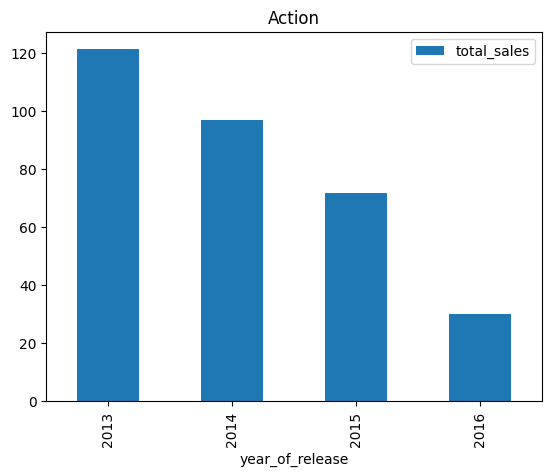

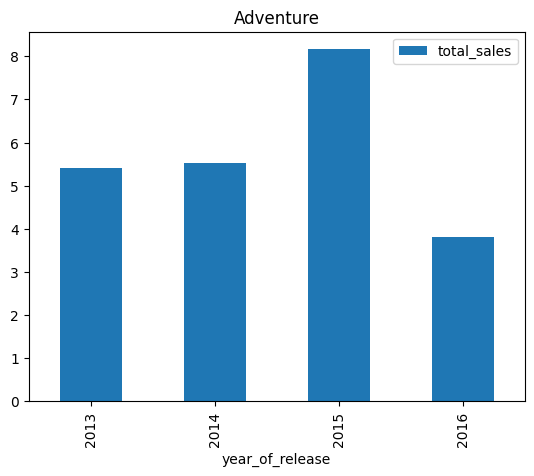

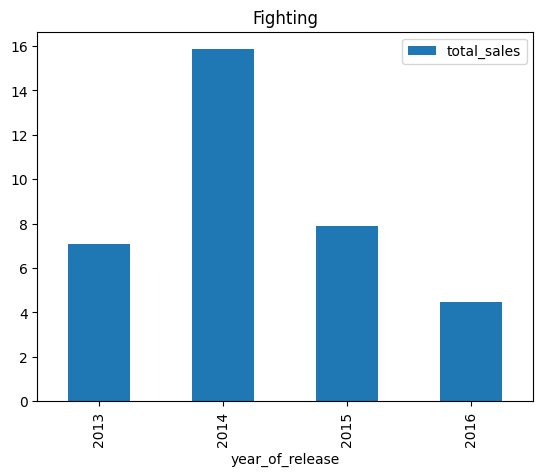

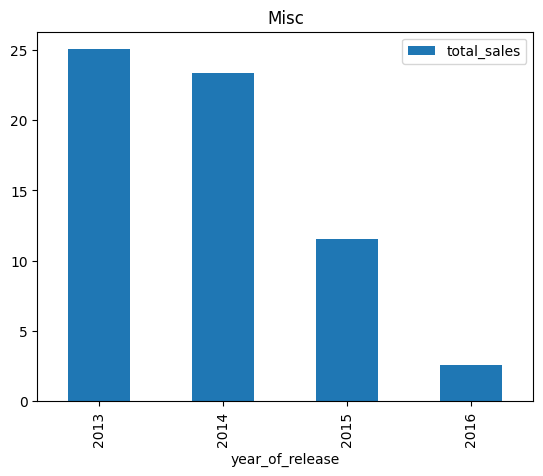

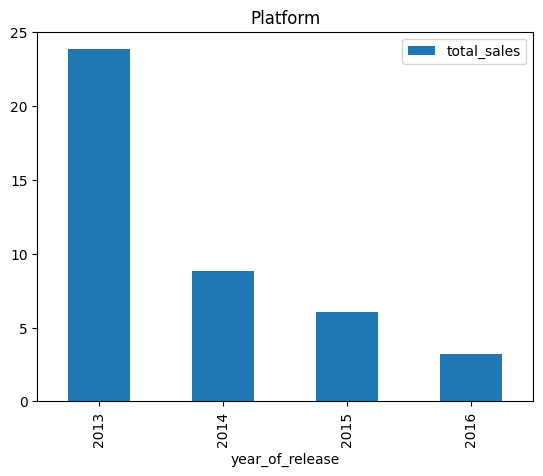

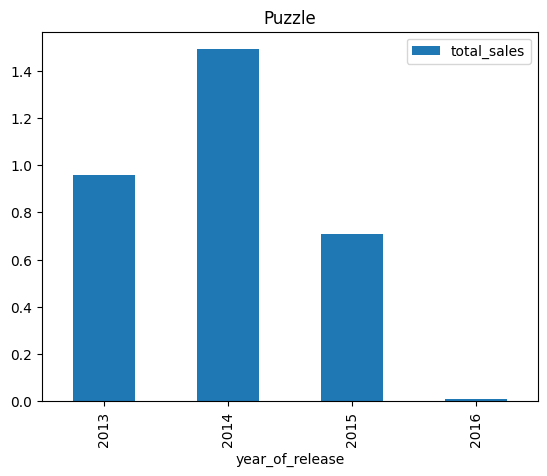

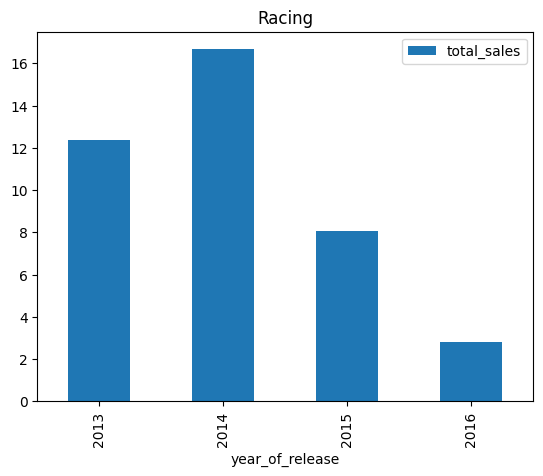

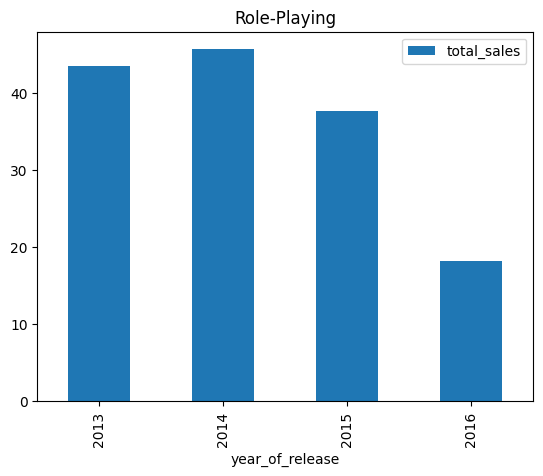

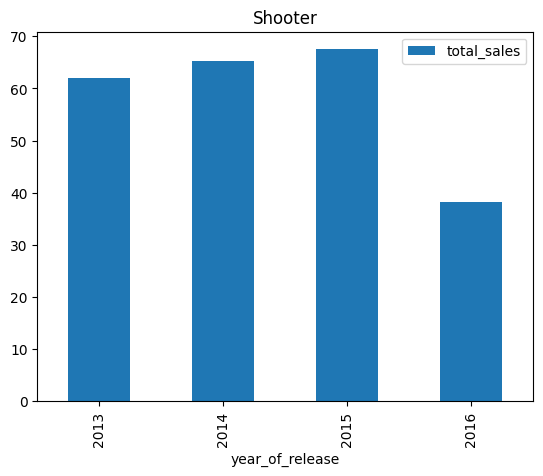

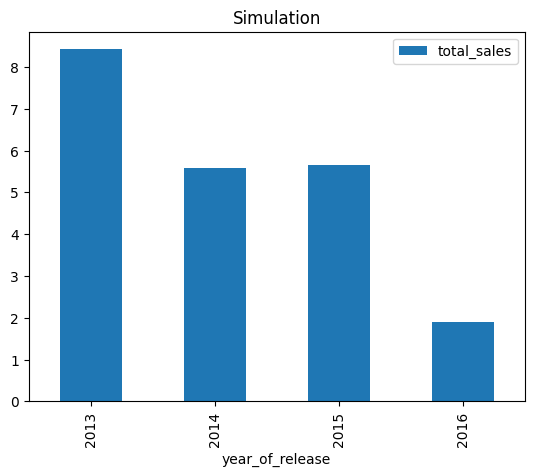

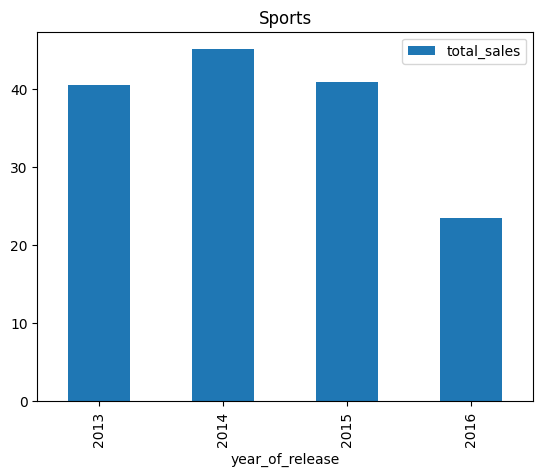

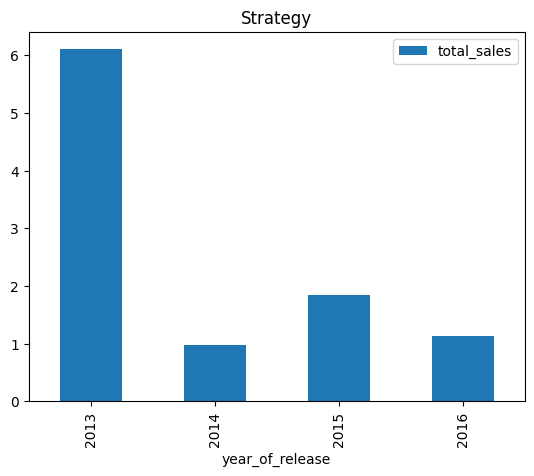

In [44]:
#distribution graphs to identify rising and falling genres
for value in genre_by_sales['genre']:
    genre_by_year[genre_by_year['genre'] == value].plot(kind='bar', x='year_of_release')
    plt.title(value)
    plt.show()

Using the same logic as with the platforms, let's look at the genres whose sales increased in 2015 relative to 2013.
Total growing genres:
- Shooter
- Sports
- Fighting

**Summary of the exploratory data analysis section:**

1. Sales of games on new gaming platforms grow for about 3-4 years, and then begin to decline.
2. The average life of the platform (excluding PC) is about 7 years.
3. For our analysis, it is enough to take data from 2013.
4. The most popular and growing platforms right now are PS4 and Xbox One.
5. Sales of games for these platforms are affected by critical ratings, especially if the rating is above 60 points.
6. Popular genres in terms of sales - action, shooters, sports, RPG.
7. Games of genres - shooters, sports games, platformers are much better than others on average.

# User portrait by region

**Most popular platforms in US, EU and Japan**

In [45]:
#compile a table by platform by US region
platform_na = good_data.groupby('platform').agg(na_sales=('na_sales', 'sum'))
platform_na['%'] = platform_na['na_sales'] / platform_na['na_sales'].sum() * 100

#print top-5
platform_na.sort_values(by='na_sales', ascending=False).head(5)

,na_sales,%
platform,,
PS4,108.74,24.875326
XOne,93.12,21.302100
X360,81.66,18.680514
PS3,63.50,14.526239
3DS,38.20,8.738619


In [46]:
#compile a table by EU region and print top-5
platform_eu = good_data.groupby('platform').agg(eu_sales=('eu_sales', 'sum'))
platform_eu['%'] = platform_eu['eu_sales'] / platform_eu['eu_sales'].sum() * 100
platform_eu.sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales,%
platform,,
PS4,141.09,36.065029
PS3,67.81,17.333401
XOne,51.59,13.187291
X360,42.52,10.868843
3DS,30.96,7.913908


In [47]:
#compile a table by Japan region and print top-5
platform_jp = good_data.groupby('platform').agg(jp_sales=('jp_sales', 'sum'))
platform_jp['%'] = platform_jp['jp_sales'] / platform_jp['jp_sales'].sum() * 100
platform_jp.sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales,%
platform,,
3DS,67.81,49.319951
PS3,23.35,16.983053
PSV,18.59,13.520983
PS4,15.96,11.608117
WiiU,10.88,7.913303


**Conclusion:**
In the US and the EU, the top 5 platforms for games are similar, except that in the US, the Xbox is more popular, and in the EU, PS (even previous generations).

In Japan, the most popular platforms are from Nintendo and Sony. Xbox is not popular.

**Top Genres by Region: US, EU, and Japan**

In [48]:
#compile a table by game genres in the USA and display the top 5
genre_na = good_data.groupby('genre').agg(na_sales=('na_sales', 'sum'))
genre_na['%'] = genre_na['na_sales'] / genre_na['na_sales'].sum() * 100
genre_na.sort_values(by='na_sales', ascending=False).head(5)

,na_sales,%
genre,,
Action,125.83,28.784829
Shooter,109.74,25.104086
Sports,65.27,14.931143
Role-Playing,46.40,10.614448
Misc,27.46,6.281740


In [49]:
#compile a table by genres of games in the EU and display the top 5
genre_eu = good_data.groupby('genre').agg(eu_sales=('eu_sales', 'sum'))
genre_eu['%'] = genre_eu['eu_sales'] / genre_eu['eu_sales'].sum() * 100
genre_eu.sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales,%
genre,,
Action,117.87,30.129598
Shooter,87.86,22.458526
Sports,60.34,15.423941
Role-Playing,36.97,9.450167
Racing,20.19,5.160911


In [50]:
#compile a table by genres of games in Japan and display the top 5
genre_jp = good_data.groupby('genre').agg(jp_sales=('jp_sales', 'sum'))
genre_jp['%'] = genre_jp['jp_sales'] / genre_jp['jp_sales'].sum() * 100
genre_jp.sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales,%
genre,,
Role-Playing,50.01,36.373554
Action,39.65,28.838461
Misc,9.03,6.567750
Fighting,7.63,5.549495
Shooter,6.61,4.807622


**Conclusion:**
In the US and the EU, the most popular game genres are very similar - Action, Shooter, Sports, RPG. Only 5th place differs. At the same time, the top 5 genres in the US and the EU occupy more than 80%.

The most popular genre in Japan is RPG and it stands out from the rest - more than a third of sales. The second genre is action and together they account for more than 60% of all sales.

**Influence of ESRB rating by region**

In [51]:
#compile a general table of game sales broken down by rating category and by sales region

rating_grouped = good_data.groupby('rating').agg(na_sales=('na_sales', 'sum'), eu_sales=('eu_sales', 'sum'), jp_sales=('jp_sales', 'sum'))

na_sales_share = rating_grouped['na_sales'] / rating_grouped['na_sales'].sum() * 100
rating_grouped.insert(loc=1, column='na_%', value=na_sales_share)

eu_sales_share = rating_grouped['eu_sales'] / rating_grouped['eu_sales'].sum() * 100
rating_grouped.insert(loc=3, column='eu_%', value=eu_sales_share)

jp_sales_share = rating_grouped['jp_sales'] / rating_grouped['jp_sales'].sum() * 100
rating_grouped.insert(loc=5, column='jp_%', value=jp_sales_share)

rating_grouped

,na_sales,na_%,eu_sales,eu_%,jp_sales,jp_%
rating,,,,,,
E,78.94,18.058288,82.80,21.165103,15.00,10.909884
E10+,54.02,12.357597,42.53,10.871399,5.89,4.283948
M,165.21,37.793384,145.32,37.146290,14.11,10.262565
T,49.79,11.389944,41.95,10.723141,20.44,14.866536
no rating,89.18,20.400787,78.61,20.094067,82.05,59.677067


In the US and EU, only 20% of games come out without an ESRB rating, in Japan more than 60%.

The main share of sales in the US and the EU belongs to "adult" games rated M (about 40%). Then there are games for all ages - E (20%). E10+ and T add up another 20%.

In Japan, games rated M - 10% of sales. The remaining 30% are E, E10+ and T.

In [52]:
#separately consider the impact of rating on game genres by region
rating_grouped_genre = good_data.groupby(['genre','rating']).agg(na_sales=('na_sales', 'sum'), eu_sales=('eu_sales', 'sum'), jp_sales=('jp_sales', 'sum'))
rating_grouped_genre

na_sales  eu_sales  jp_sales
genre        rating                                 
Action       E              5.49      4.92      3.07
             E10+          20.67     18.08      1.08
             M             71.27     67.62      7.54
             T             11.04     10.07      5.25
             no rating     17.36     17.18     22.71
Adventure    E              0.31      0.54      0.53
             E10+           0.92      1.11      0.00
             M              2.90      3.23      0.42
             T              0.21      0.28      0.03
             no rating      2.80      3.06      4.13
Fighting     E10+           0.61      0.29      0.17
             M              2.54      1.05      0.02
             T              5.26      3.97      2.53
             no rating      7.14      3.24      4.91
Misc         E              2.50      2.33      1.97
             E10+           8.17      5.17      0.10
             M              0.72      0.46      0.18
             T              2.31      1.15      0.87
             no rating     13.76     10.89      5.91
Platform     E              8.70      6.45      3.43
             E10+           6.85      5.89      0.71
             T              0.21      0.28      0.03
             no rating      2.17      2.53      0.62
Puzzle       E              0.59      0.39      0.26
             E10+           0.18      0.51      0.25
             no rating      0.06      0.10      0.67
Racing       E              8.17     11.96      1.89
             E10+           3.03      3.84      0.14
             M              0.06      0.02      0.00
             T              0.66      1.71      0.03
             no rating      1.04      2.66      0.24
Role-Playing E              0.68      0.49      0.39
             E10+           0.86      0.52      1.08
             M             16.67     15.77      2.51
             T              6.03      3.91     10.67
             no rating     22.16     16.28     35.36
Shooter      E10+           3.61      3.13      1.55
             M             70.99     56.92      3.44
             T             15.58     10.92      0.81
             no rating     19.56     16.89      0.81
Simulation   E              1.12      2.94      1.42
             E10+           0.53      0.91      0.43
             T              1.18      2.46      0.18
             no rating      1.92      4.53      2.49
Sports       E             50.53     52.11      2.04
             E10+           7.93      2.19      0.09
             T              5.76      5.10      0.01
             no rating      1.05      0.94      2.77
Strategy     E              0.85      0.67      0.00
             E10+           0.66      0.89      0.29
             M              0.06      0.25      0.00
             T              1.55      2.10      0.03
             no rating      0.16      0.31      1.43

**Conclusion:**
In the US and EU, each genre has 1-2 most popular game ratings. For example, for racing and sports games - E, and for shooters and action games - M.
In Japan, most games do not have a rating.

# Testing hypotheses

**First hypothesis**

Let's compare the average user ratings of the Xbox One and PC platforms. Since we have two general populations, we will use the st.ttest_ind() method.

Let's take a high level of statistical significance - let alpha = 0.01.

Null hypothesis: The average user ratings of the Xbox One and PC platforms are the same.

An alternative hypothesis is formulated from the opposite - the average user ratings of Xbox One and PC are not equal.

In [53]:
#collect data on user ratings without gaps by platform
xone_user_score = good_data[(good_data['platform'] == 'XOne') & (~good_data['user_score'].isna())]['user_score']
pc_user_score = good_data[(good_data['platform'] == 'PC') & (~good_data['user_score'].isna())]['user_score']

alpha = 0.01 # level of statistical significance
# if p-value is less than it, we reject the hypothesis

results = st.ttest_ind(xone_user_score, pc_user_score, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Couldn\'t reject the null hypothesis') 

p-value: 0.14759594013430463
Couldn't reject the null hypothesis


**Second hypothesis**

Let's compare the average user ratings of the Action and Sports genres. Since we have two general populations, we will use the st.ttest_ind() method.

Let's take a high level of statistical significance - let alpha = 0.01.

Null hypothesis: the average user ratings of the Action and Sports genres are different.

Alternative hypothesis: the average user ratings of the Action and Sports genres are the same.

In [54]:
#collect data on user ratings without data gaps
action_user_score = good_data[(good_data['genre'] == 'Action') & (~good_data['user_score'].isna())]['user_score']
sports_user_score = good_data[(good_data['genre'] == 'Sports') & (~good_data['user_score'].isna())]['user_score']

alpha = 0.01 # statistical significance level
# reject the null hypothesis if lower than this

results = st.ttest_ind(action_user_score, sports_user_score, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Couldn\'t reject the null hypothesis')

p-value: 2.4191414517472698e-20
Reject the null hypothesis
